## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Which type of user are more on facebook, male or female?](#section401)<br/>
    - 4.2 [Users of which age are more on Facebook?](#section402)<br/>
    - 4.3 [Who gets more likes, male of female?](#section403)<br/>
    - 4.4 [Does tenure affects the numbers if likes received?](#section404)<br/>
    - 4.5 [How does age affects friends count and likes of an user?](#section405)<br/>
    
5. [Pairplot](#section5)<br/>  
6. [Conclusions](#section5)<br/>  

### 1. Problem Statement

<a id=section1></a>
- This is facebook data with users details like user's likes, friends, tenure, age, gender etc, analyse it to find useful insights

In [14]:
import numpy as np                                                 # Implemennts multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

<a id=section2></a>
### 2. Data Loading and Description

In [15]:
facebook_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv")

In [16]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [17]:
facebook_df.describe(include='all')

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,98828,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,58574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,NaN,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,NaN,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,NaN,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,NaN,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,NaN,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000


<a id=section3></a>
### 3. Data Profiling

<a id=section301></a>
### 3.1 Understanding the Dataset

- We will profile the tha data with pandas profiling package available to understand it thouroughly 

<a id=section302></a>
### 3.2 Pandas Pre-profiling

In [18]:
profile = pandas_profiling.ProfileReport(facebook_df)
profile.to_file(output_file="facebook_preprocessing.html")

<a id=section303></a>
### 3.3 Pre-processing
- As we could see from the profiling 'tenure' and 'gender' columns have null values, we will drop columns with null values

In [19]:
facebook_df.dropna(inplace=True)

<a id=section304></a>
### 3.4 Pandas Post-profiling
- After removing null values we will profile the data again using pandas profiling tool 

In [20]:
profile = pandas_profiling.ProfileReport(facebook_df)
profile.to_file(output_file="facebook_postprocessing.html")

<a id=section4></a>
### 4. Questions

<a id=section401></a>
### 4.1 Which type of user are more on facebook, male or female?

using seaborn count plot

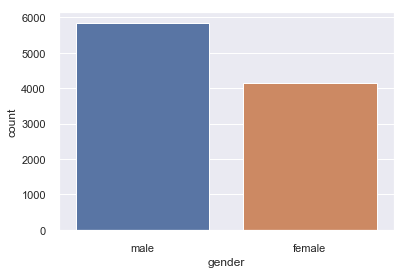

In [21]:
sns.countplot(data=facebook_df.sample(10000), x='gender')

- As we can see from count plot male users are more on facebook.

<a id=section402></a>
### 4.2 Users of which age are more on Facebook?

using facet grid plot of seaborn

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Age distribution using FacetGrid')

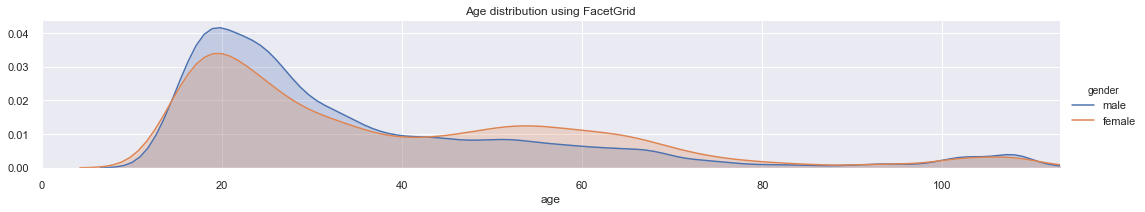

In [22]:
as_fig = sns.FacetGrid(facebook_df,hue='gender',aspect=5)
as_fig.map(sns.kdeplot,'age',shade=True)
oldest = facebook_df['age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Age distribution using FacetGrid')

From the facet grid above we can see
- Most of the users are of age around 20 years.
- Between age group 13 to 40 years, male are more in number and between 40 to 60 years female are more.
- It means more young males are there as compared to young females. 
- In case of mid-aged group more females are there on Facebook as compared to males.

<a id=section403></a>
### 4.3 Who gets more likes, male of female?

using dataframe group by and group bar chart

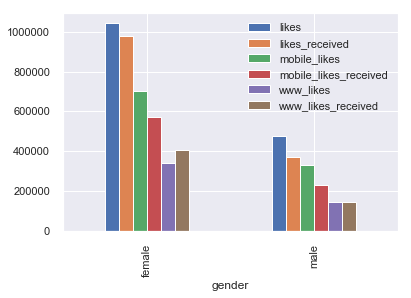

In [23]:
facebook_df.sample(10000).groupby('gender').sum().plot.bar(y=['likes','likes_received','mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'])

As we can see in the group bar chart
- Females get much more like as compared to males.
- Females receive more likes than they give where as males get less like than they give.
- Interesting observation is people using web browsers give more likes than they receive.

### 4.4 Does tenure affect the numbers of likes received?
we will user seaborn's scatter plot to analyse

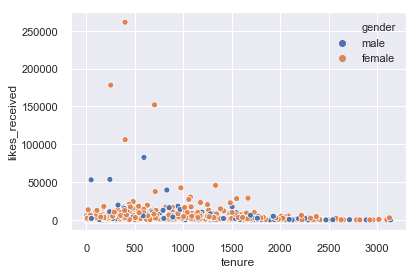

In [24]:
sns.scatterplot(x="tenure",y="likes_received",hue="gender", data=facebook_df)

As we can see from the scatter plot tenure of the user does not affect the likes received

### 4.5 How does age affects friends count and likes of an user?

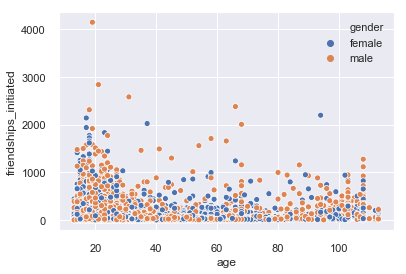

In [25]:
sns.scatterplot(x="age", y = 'friendships_initiated', hue='gender', data=facebook_df.sample(10000))

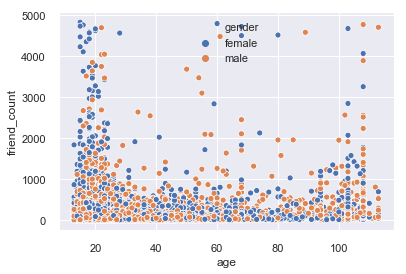

In [26]:
sns.scatterplot(x="age", y = 'friend_count', hue='gender', data=facebook_df.sample(10000))

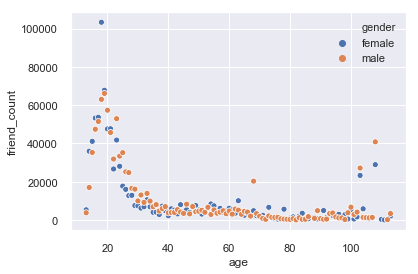

In [27]:
data_grouped_by_gender_age = facebook_df.sample(10000).groupby(['gender','age'], as_index =False).sum()#.plot.scatter(x='tenure',y='likes_received')
sns.scatterplot(x="age", y = 'friend_count', hue='gender', data=data_grouped_by_gender_age)

When friend count is grouped by age, as we can see, for age between 18 to 24 friend count are very high

### 5. Pairplot 

KeyError: 'gender'

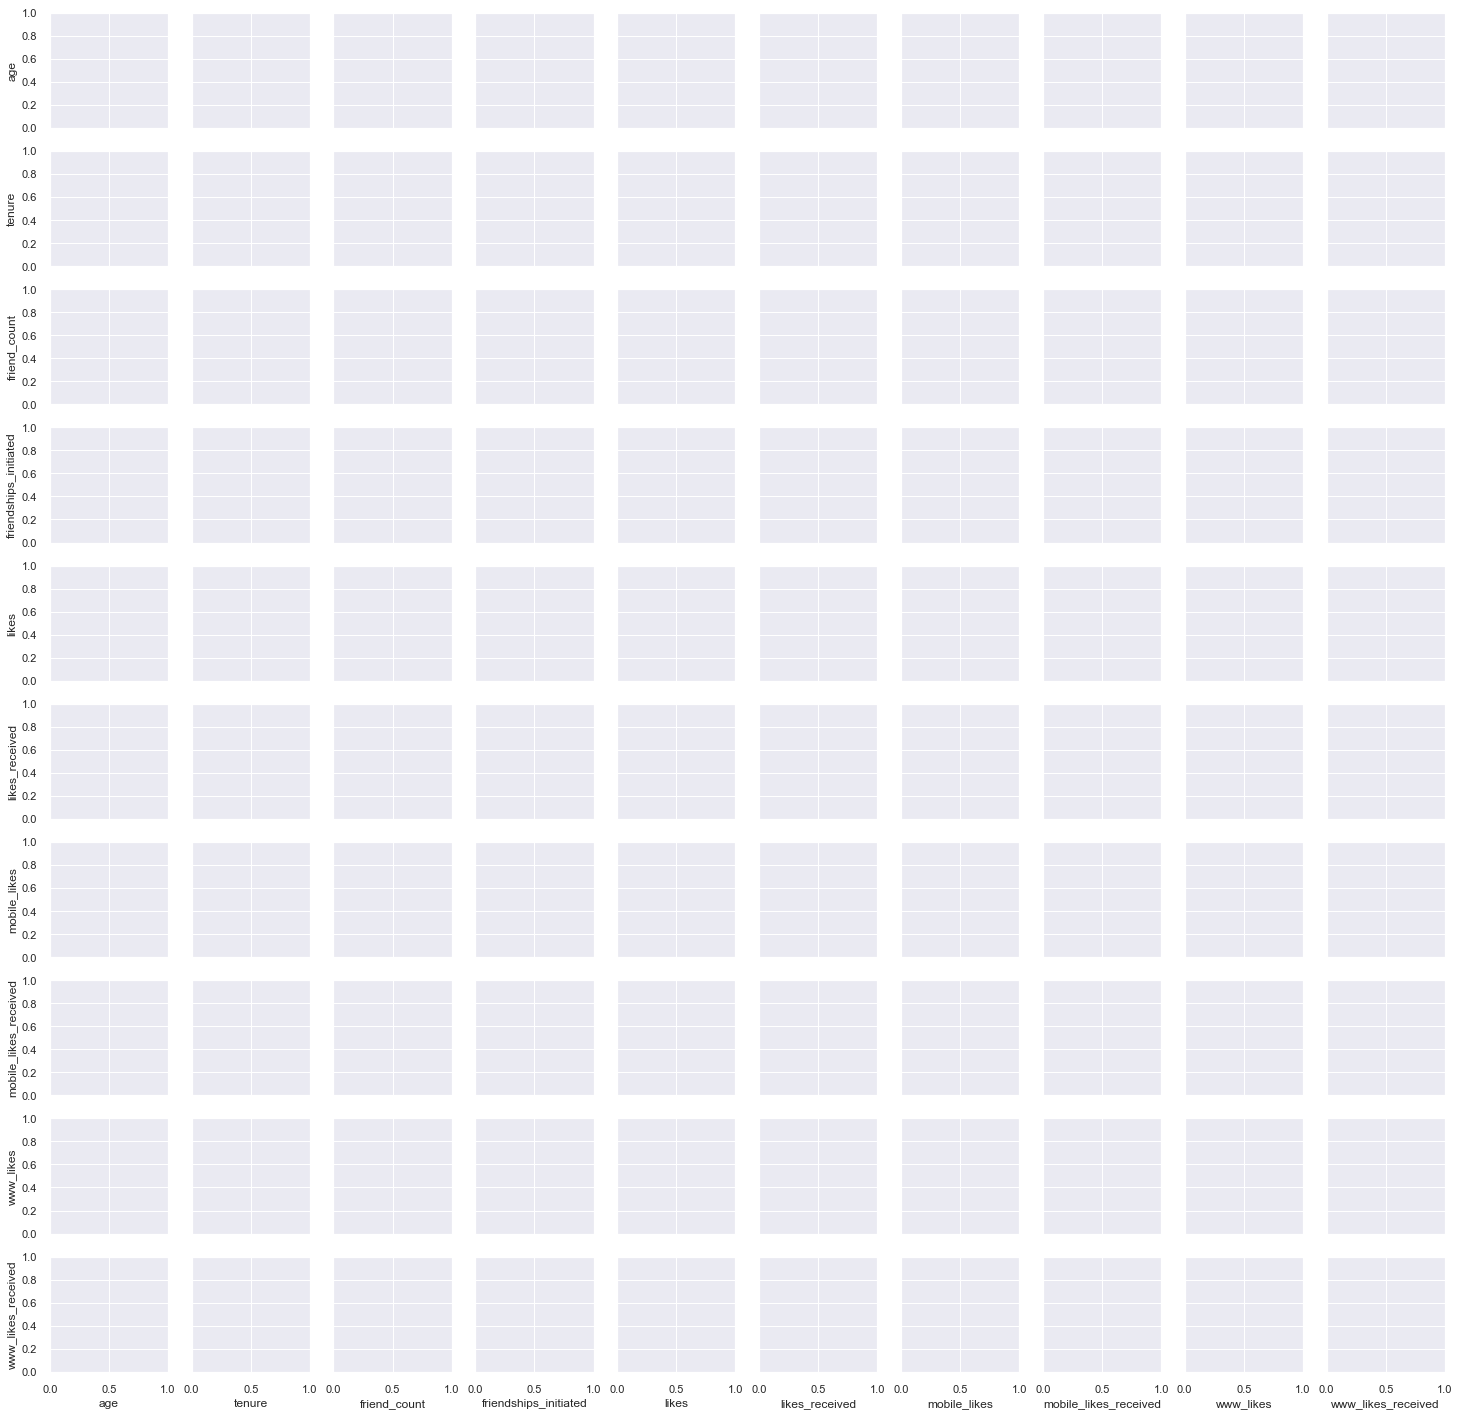

In [31]:
sns.pairplot(facebook_df.sample(1000)[['age','tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received']], hue='gender')

### 6. Conclusion

As we observed from different charts
- Females get more like and have more friends on facebook.
- Even total males on facebook are more, females have more likes and friends combined
- Users between age 18 and 24 are very high in numbers, it means youngsters are very much actively using facebook.
- Tenure of user on facebook does not affect his/her likes and friends count
